# Basic example
Let's use EOReader for the first time.

## Imports


In [1]:
import os
import tempfile

# EOReader
from eoreader.reader import Reader
from eoreader.bands import GREEN, NDVI, CLOUDS

## Data

First of all, we need some satellite data. 
Let's open a `Sentinel-2` product.

In [2]:
path = os.path.join("/home", "prods", "S2", "PB 02.07+", "S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE")

## Create the Reader
First, create the `Reader` object.
This object will automatically detect the type of constellation of your product.
It relies on the internal composition of the product (usually the presence of the metadata file), so please do not remove them.

*The `Reader` is a singleton that should be called only once.*
*It can be used several times to open all your satellite products.*

No need to extract the product here: archived `Sentinel-2` are handled by EOReader.

In [3]:
reader = Reader()

## Open the product

The reader is used to open your product, just call the `open` function.

In [4]:
prod = reader.open(path)
prod

eoreader.S2Product 'S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749'
Attributes:
	condensed_name: 20200114T065229_S2_T40REQ_L2A_094749
	path: /home/prods/S2/PB 02.07+/S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE
	constellation: Sentinel-2
	sensor type: Optical
	product type: MSIL2A
	default pixel size: 10.0
	default resolution: 10.0
	acquisition datetime: 2020-01-14T06:52:29
	band mapping:
		COASTAL_AEROSOL: 01
		BLUE: 02
		GREEN: 03
		RED: 04
		VEGETATION_RED_EDGE_1: 05
		VEGETATION_RED_EDGE_2: 06
		VEGETATION_RED_EDGE_3: 07
		NIR: 08
		NARROW_NIR: 8A
		WATER_VAPOUR: 09
		SWIR_1: 11
		SWIR_2: 12
	needs extraction: False
	cloud cover: 63.86422
	tile name: T40REQ

### Output

You can specify an output folder after creation, or on creation of the `Product` object.
If not specified, the output will be stored in a temporary folder and will be removed when the product object is deleted.

By default, your temporary files such as cleaned spectral bands are written on disk in this output folder.
You can prevent them from being written by specifying the `remove_tmp` argument. 

```python
prod = reader.open(path, output_path="/my/output", remove_tmp=True)
```

### Condensed name

If you chose to create the output folder after creation of the `Product` object, you can leverage the `condensed_name` to name it.  

The `condensed_name` of your product is a powerful feature: it is the **more compact name** possible to identify your product in a **unique** way, with a pattern **common** to every EOReader product.  
It is very convenient to name in the same way all your results, to be able to sort them by date, sensors, etc.

It is constructed this way: `{date}_{constellation}_{other_identifiers}` (tiles, ID, instrument, etc. depending on the sensor type)

In [5]:
# Write the output in a temporary folder which will b edeleted at the end of this notebook.
# This is for shocasing purposes only as this is done automatically under the hood
tmp_folder = tempfile.TemporaryDirectory()
prod.output = os.path.join(tmp_folder.name, prod.condensed_name)
prod.output

PosixPath('/tmp/tmpgb8i24na/20200114T065229_S2_T40REQ_L2A_094749')

## Load

Just load easily some bands and index. The `load` function outputs a dictionary of `xarray.DataArray`.

The bands can be called by their ID, name or mapped name.
For example, for Sentinel-3 OLCI you can use `7`, `Oa07` or `YELLOW`. For Landsat-8, you can use `BLUE` or `2`.

In [6]:
# Load those bands as a xarray.Dataset
band_ds = prod.load([GREEN, NDVI, CLOUDS])
band_ds

/opt/conda/lib/python3.11/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(
/opt/conda/lib/python3.11/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(


<xarray.Dataset> Size: 1GB
Dimensions:                  (band: 1, y: 10980, x: 10980)
Coordinates:
    spatial_ref              int64 8B 0
  * band                     (band) int64 8B 1
  * y                        (y) float64 88kB 3e+06 3e+06 ... 2.89e+06 2.89e+06
  * x                        (x) float64 88kB 5e+05 5e+05 ... 6.098e+05
Data variables:
    SpectralBandNames.GREEN  (band, y, x) float32 482MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    NDVI                     (band, y, x) float32 482MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    CloudsBandNames.CLOUDS   (band, y, x) float32 482MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes:
    long_name:         GREEN NDVI CLOUDS
    constellation:     Sentinel-2
    constellation_id:  S2
    product_path:      /home/prods/S2/PB 02.07+/S2B_MSIL2A_20200114T065229_N0...
    product_name:      S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    product_filename:  S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    instrument:        MSI
    product_type:      MSIL2A
    acquisition_date:  20200114T065229
    condensed_name:    20200114T065229_S2_T40REQ_L2A_094749
    orbit_direction:   DESCENDING
    cloud_cover:       63.86422

In [7]:
# Load individual bands (as xarray.DataArray)
green = band_ds[GREEN]
ndvi = band_ds[NDVI]
clouds = band_ds[CLOUDS]

green

<xarray.DataArray <SpectralBandNames.GREEN: 'GREEN'> (band: 1, y: 10980,
                                                      x: 10980)> Size: 482MB
dask.array<clip, shape=(1, 10980, 10980), dtype=float32, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 8B 0
  * band         (band) int64 8B 1
  * y            (y) float64 88kB 3e+06 3e+06 3e+06 ... 2.89e+06 2.89e+06
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
Attributes: (12/14)
    path:              /tmp/tmpgb8i24na/20200114T065229_S2_T40REQ_L2A_094749/...
    long_name:         GREEN
    constellation:     Sentinel-2
    constellation_id:  S2
    product_path:      /home/prods/S2/PB 02.07+/S2B_MSIL2A_20200114T065229_N0...
    product_name:      S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    ...                ...
    product_type:      MSIL2A
    acquisition_date:  20200114T065229
    condensed_name:    20200114T065229_S2_T40REQ_L2A_094749
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       63.86422

In [8]:
# Let's see what's inside your output folder
[str(f.relative_to(prod.output)) for f in prod.output.glob("**/*.tif")]

['tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_CLDPRB_10m.tif',
 'tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_CLOUDS_10m.tif',
 'tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_NDVI_10m.tif',
 'tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_GREEN_10m_nodata.tif',
 'tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_RED_10m_nodata.tif',
 'tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_NIR_10m_nodata.tif']

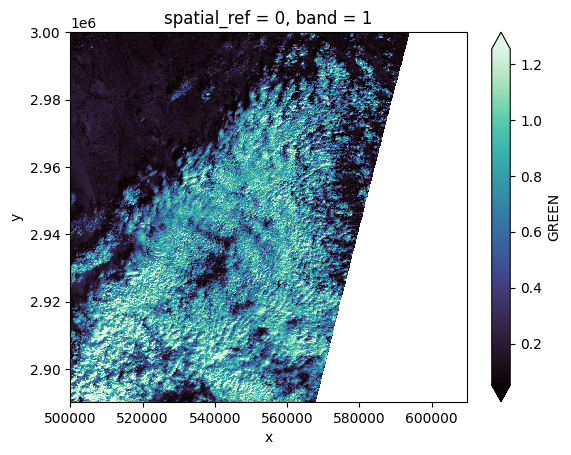

In [9]:
# Plot a subsampled version of the GREEN band
green[:, ::10, ::10].plot(robust=True, cmap="mako");

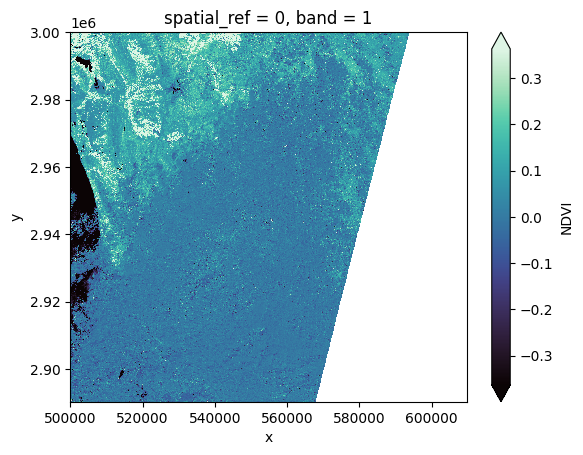

In [10]:
# Plot a subsampled version of the NDVI spectral index
ndvi[:, ::10, ::10].plot(robust=True, cmap="mako");

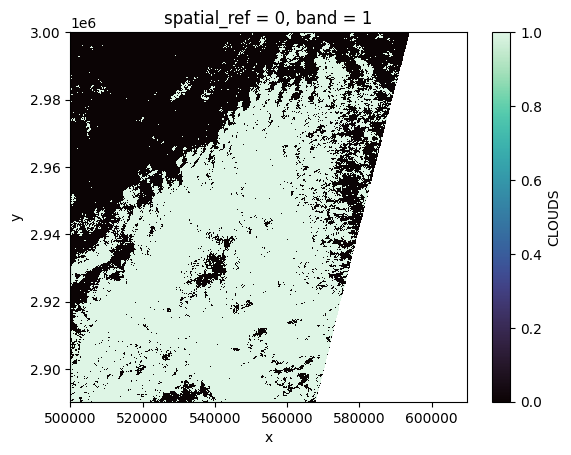

In [11]:
# Plot a subsampled version of the CLOUD mask
clouds[:, ::10, ::10].plot(robust=True, cmap="mako");

In [12]:
# Remove the output (it would have been best to call the temporary directory in a context manager)
tmp_folder.cleanup()